# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

In [2]:

# Importing necessary modules# Impor 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
#Giving a nicer look by using the seaborn style.
sns.set()

#Generating values for the ECDF (graphing original data)
ecdf_x=np.sort(df["temperature"])
ecdf_y=np.arange(1, len(ecdf_x)+1)/len(ecdf_x)

After importing the necessary modules I generated Numpy arrays to be able to plot the Empirical CDF (CDF of the original data) for the purpose of comparing the validity of a normal distribution as a model for the data. X axis values (ecdf_x) are simply an ancending list of temperature values. This sorting is necessary as otherwise the graph wouldn't make sense. The Y values (ecdf_y) are normalised incremental 'probability values' to simulate the increments on the CDF graph.

In [3]:
#Plotting the ECDF with an appropriate label and labelling the axes.#Plotti 
plt.plot(ecdf_x, ecdf_y, marker=".", linestyle="none", color="blue", label="Empirical CDF")
plt.xlabel("Temperature")
plt.ylabel("ECDF")

#Generating a sorted array of normally distributed values and the accompanying y axis values.
normal_samples=np.sort(np.random.normal(np.mean(df["temperature"]),np.std(df["temperature"]) , size=10000))
cdf_y=np.arange(1, len(normal_samples)+1)/len(normal_samples)

The arrays are plotted and the graph is labelled as "Empirical CDF". I've chosen to plot dots and not the standard option for lines due to the moderately small amount of data. It wouldn't make sense to draw lines between distinct data points as no data is present there. The axes are labelled appropriately.

To check the validity of approximating the actual data as 'normally distributed' I generated a numpy array normal_samples (an analogue of ecdf_x) which is a sorted array of values that would be obtained by a normal distribution with a mean and standard deviation corresponding to the sample mean and sample standard deviation respectively. The mean is an appropriate optimal parameter (as opposed to median) due to the small spread in data (small standard deviation of 0.7). The size of normal_samples is large to generate a smooth curve and reduce variability of the Theoretical CDF generated during each run. The size of 10,000 is arbibrary, but a nice tradeoff between an array too large that takes up alot of memory and one too small that varies alot from run to run. cdf_y is the Y axis analogue of ecdf_y for the simulated dataset.

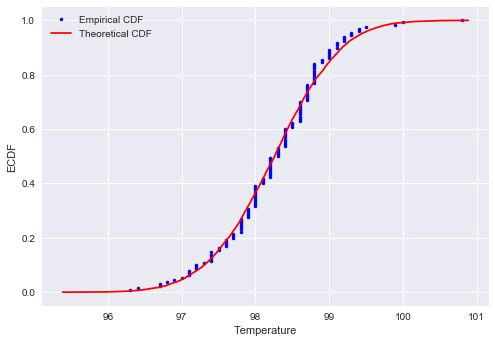

In [4]:
#Plotting the Theoretical CDF of the normally distributed data on top of the ECDF.
plt.plot(normal_samples, cdf_y, color="red", label="Theoretical CDF")
plt.legend(loc="upper left")

#Showing the Empirical and Theoretical CDFs on one graph.
plt.show()






The Theoretical CDF is plotted, the legend is added and the graph is shown. From the graph we can see that there is good agreement between the Empirical CDF and the Theoretical CDF (of a Normal Distribution) leading to the conclusion that the sample data is modelled well by a Normal Distribution with mean and standard deviation of the distribution corresponding to the sample mean and standard deviation respectively (as mentioned above). So the answer is yes, the distribution of body temperatures is normal.

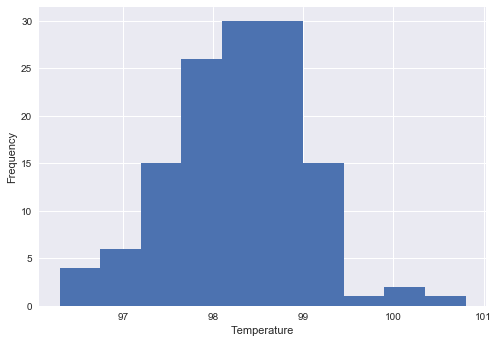

In [5]:
df.temperature.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

In [6]:
df_mean = np.mean(df.temperature)
df_sd = np.std(df.temperature)
temperatures = df.temperature.values
print('Proportion of values within one standard deviation of the mean:',
      len(temperatures[(temperatures>df_mean-df_sd) & (temperatures<df_mean+df_sd)])/len(temperatures))

print('Proportion of values within two standard deviations of the mean:',
      len(temperatures[(temperatures>df_mean-2*df_sd) & (temperatures<df_mean+2*df_sd)])/len(temperatures))

print('Proportion of values within three standard deviations of the mean:',
      len(temperatures[(temperatures>df_mean-3*df_sd) & (temperatures<df_mean+3*df_sd)])/len(temperatures))

Proportion of values within one standard deviation of the mean: 0.6923076923076923
Proportion of values within two standard deviations of the mean: 0.9461538461538461
Proportion of values within three standard deviations of the mean: 0.9923076923076923


It looks like 68-95-99.7 rule holds, but in order to have stronger proof:

In [10]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The second value is a p-value which is nearly 26%. That more than large enough to fail to reject the null hypothesis. That being said, let me set the threshold I'll use to be 5%. I can now work under the assumption that the temperatures are normally distributed.

### 2. Is the sample size large? Are the observations independent?

#### The original observations are independant 
By definition, each observation (each row) does not provide any information about any other observation. However, the "Data were constructed to match as closely as possible the histograms and summary statistics presented in that article." hence this dataset is not a random sample since it was chosen to be representative of the articles' findings (as expressed in the quote). Though this poses no problem for the validity of this data as a condition of CLT or else.

It's hard to answer the question about the size of the sample. In the case that a sample size is considered large if it represents a noticeable proportion of the entire population then no, this sample is not large as the population size (all men/women on earth) is obviously much much greater. If we consider the statistical n>30 benchmark for a large sample size then indeed this sample is large. Considering that the size of the sample is only important in terms of performing tests and approximating population parameters, by the n>30 rule we conclude that the sample size is large for all statistical purposes of this exercise.

### 3. Is the true population mean really 98.6 degrees F?

#### Would you use a one-sample or two-sample test? Why?

There is only one sample present so a two-sample test is not possible (as it requires 2 independant samples    from distinct populations), hence a one-sample test will be used.

#### In this situation, is it appropriate to use the t or z statistic?

A Z test is used when the sample size is > 30 and the population standard deviation is known. T test is used when the sample size is < 30 or the population standard deviation is unknown. However, it is possible to use perform a Z test also since for large sample sizes (n>30) the sample standard deviation is an unbiased estimator for the population standard deviation so a Z score can be computed. Both are valid here given than n>30, but I will choose the Z test.


The Null Hypotheses is posed as follows: "The true population mean is 98.6 degrees F (μ=98.6)." The alternate hypothesis is posed as: "The true population mean is not 98.6 degrees F (μ=98.6)".

In [8]:
#Calculating sample mean and standard deviation. Setting the proposed population mean.#Calcul 
sample_mean=np.mean(df["temperature"])
sample_std=np.std(df["temperature"], ddof=1)/np.sqrt(len(df["temperature"])) #Computing unbiased estimator of population std.
proposed_mean=98.6
# Z score calculated.
# z_value=(proposed_mean-sample_mean)/sample_std
# print("Z value:", z_value)
# p_value = scipy.stats.norm.sf(z_value)
# print("p value:", p_value)

In [9]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The sample mean and standard deviation of the original sample are calculated as sample_mean and sample_std respectively, the proposed population mean is stored as proposed_mean. Since the population standard deviation is not known, we use sample_std as its unbiased estimator, hence the ddof=1 optional argument which divides the variance by n-1 and not n (n being the sample size).

From the calculated Z value and by referring to a Z table, we see that the probability of the mean body temperature being 98.6F is < 0.0001 (the scipy function further emphesises this) and so for any commonly chosen significance level, we reject the null hypothesis in favor of the alternate hypothesis to conclude that the mean body temperature is not 98.6F.

In [8]:
#Initializing an array to hold the generated means from bootstrap samples (the bootstrap replicates)#Initia 
means=np.empty(10000)

#Looping 10,000 times
for i in range(10000):
   # to generate bootstrap replicates (test statistics of samples generated by bootstrapping) and store them in the array.
   simulated_sample=np.random.choice(df["temperature"], len(df["temperature"]))
   means[i]=np.mean(simulated_sample)

# Calculating the p value
p_value_bootstrap=np.sum(means > proposed_mean)/len(means)
print("P value: %f" % (p_value))

P value: 0.000000


We repeat the Hypothesis test, but this time using bootstrapping. 10,000 simulated means are calculated and stored in the means array. The p value is defined as the proportion of simulated sample means at least as extreme as the proposed mean. A large p value would indicate that proposed_mean is a very probable outcome given the null hypothesis and hence we should not reject the null hypothesis. A very small p value (as in this case) would indicate that there are very few possible outcomes that are as extreme or more extreme than the actual outcome that we observed and hence is most likely false. Hence, once again we reject the null hypothesis in favor of the alternate hypothesis. The histogram below highlights this visually.

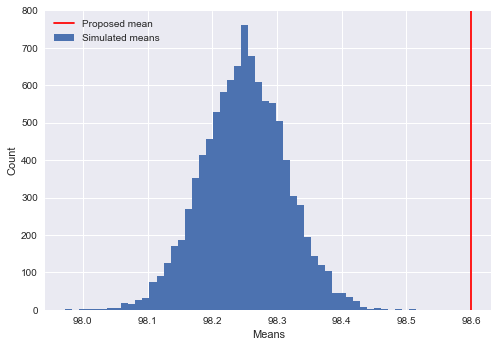

In [9]:
plt.hist(means, bins=50, label="Simulated means") # plotting the sampling distribution,
plt.xlabel("Means") # with appropriate labels
plt.ylabel("Count")
plt.axvline(x=proposed_mean, color="red", label="Proposed mean") # Adding a vertical line to show the proposed body temp mean
plt.legend(loc="upper left")
plt.show()

#### Now try using the other test. How is the result be different? Why?

To do the T test we note down the null hypothesis as before (The true population mean is 98.6F) and proceed with the test assuming the null hypothesis to be true. The T score formula is T=(x-μ)/(s/√n). Where μ is the population mean, s is the sample standard deviation, x is the sample mean and n is the sample size. Z scores are computed on normal distributions and the T test uses the t distribution which tends towards the normal distribution at the limit n ->∞ although for n>30 the t distribution is approximately normal. Given that n=130, the population standard deviation can be aproximated, both the Z test and T test are performed on the normal distribution and the formula is identical.However, given that the population standard deviation had to be approximated by the standard deviation of the sampling distribution of the sample mean, the T test produces a slightly more accurate result than the Z test.

### 4. Draw a small sample of size 10 from the data and repeat both tests.¶


#### Which one is the correct one to use?

t test, as sample size is < 30 and the population standard deviation is not known. Thus our sample does not produce a normal distribution and a Z test cannot be performed.

Actual t value: -5.454823, p value (for sample of 10): 0.004300



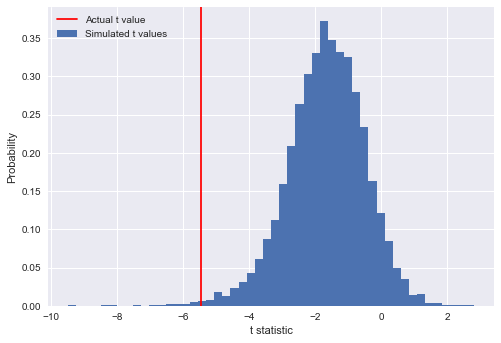

In [10]:
actual_t_value=(sample_mean - proposed_mean)/sample_std 
t_values_10_sample=np.empty(10000)

for i in range(10000):
   simulated_sample=np.random.choice(df["temperature"], 10)
   simulated_mean=np.mean(simulated_sample)
   simulated_std=np.std(simulated_sample, ddof=1) #Calculating unbiased estimate
   t_values_10_sample[i]=(simulated_mean - proposed_mean)/(simulated_std / np.sqrt(len(simulated_sample)))

p_value_10_sample=np.sum(t_values_10_sample<actual_t_value)/len(t_values_10_sample)
print("Actual t value: %f, p value (for sample of 10): %f\n" % (actual_t_value, p_value_10_sample))
plt.hist(t_values_10_sample, bins=50, normed=True, label="Simulated t values")
plt.xlabel("t statistic")
plt.ylabel("Probability")
plt.axvline(x=actual_t_value, color="red", label="Actual t value")
plt.legend(loc="upper left")
plt.show()


The above code is the T test for a sample size of 10. I have not included comments as the process is identical to the above (other than the sample size being 10). This time we get a p value that is constantly less that 0.005 on each run, thus unless we choose a signifance level lower than 0.5% we would say that the observed t value is unlikely given the null hypothesis (that the real mean is 98.6F) and hence we reject the null hypothesis in favor of the alternate hypothesis and conclude that the real mean is not 98.6F.

The Z test cannot be performed as we don't know the population standard deviation and cannot approximate it using the sample standard deviation given that the sample size is 10 (the approximation is only valid for n>30).

#### What do you notice? What does this tell you about the difference in application of the t and z statistic?

T test is more flexible.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### Start by computing the margin of error and confidence interval.
The margin of error depends on the chosen confidence interval so it makes sense to define that first. Let us consider the case of the 95% confidence interval.

In [11]:
print("Sample mean: %f , Sample std: %f" % (sample_mean, sample_std)) #Printing previously calculated statistics.

Sample mean: 98.249231 , Sample std: 0.064304


In [12]:
percentiles=[sample_mean-1.96*sample_std, sample_mean+1.96*sample_std]
margin_of_error=(percentiles[1] - percentiles[0])/2 # Margin of error is by definition half of the confidence interval.
print("The 95%", "confidence interval for human body temperature is (%f, %f)." % (percentiles[0], percentiles[1]))
print("The Margin of Error is: %f degrees F" % (margin_of_error))

The 95% confidence interval for human body temperature is (98.123194, 98.375267).
The Margin of Error is: 0.126037 degrees F


Hence, if a temperature measurement is outside of our 95% confidence interval, we can consider it to be abnormal.

### 6. Is there a significant difference between males and females in normal temperature?

Let us begin with some visual EDA to get an overview of our temperature data.

/Users/yidingweng/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


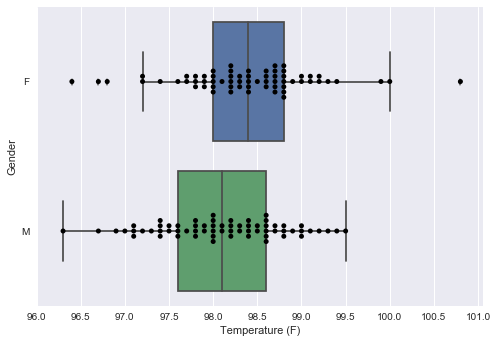

In [13]:
sns.boxplot(x="temperature", y="gender", data=df)
sns.swarmplot(x="temperature", y="gender", data=df, color="black")
plt.xlabel("Temperature (F)")
plt.ylabel("Gender")
plt.xticks([x for x in np.arange(96,101.5,0.5)])
plt.show()

There's alot that can be said from this visual, but it's hard to conclusively state if there is a significant difference in body temperatures when split by gender, so we need to conduct a hypothesis test. We will formulate the null hypothesis to be: "There is no difference in mean body temperature between genders" and the alternate hypothesis as: "There is a difference in mean body temperature between genders". Equivalently, H0: μf-μm=0, H1: μf-μm≠0. Given that the sample sizes are >30, the t distribution can very closely approximate a normal distribution and hence both tests return the same results. This time we will use a 2 sample Z test.

In [15]:
#Extracting data by gender#Extract 
male_data=df[df["gender"]=="M"] 
female_data=df[df["gender"]=="F"]

#Computing relevant statistics and setting the proposed mean temperature difference as per the null hypothesis.
male_sample_mean=np.mean(male_data["temperature"])
female_sample_mean=np.mean(female_data["temperature"])
actual_mean_diff=female_sample_mean - male_sample_mean 
proposed_mean_diff=0.0

male_sample_var=np.var(male_data["temperature"])
female_sample_var=np.var(female_data["temperature"])
distribution_std=np.sqrt(male_sample_var/len(male_data) + female_sample_var/len(female_data))

To perform this test we need to combine the male and female temperatures into a distribution of mean temperature differences. The mean and the standard deviation of the distribution are calculated. Using this distribution, we need to test how likely our observed value (actual_mean_diff) is under the null hypothesis.

In [16]:
print("Male mean: ", male_sample_mean, " Female mean: ", female_sample_mean)
print("Observed difference in means (female mean - male mean):", actual_mean_diff)
z_score=(actual_mean_diff - proposed_mean_diff)/distribution_std
print("Observed Z score:", z_score)

p_value = scipy.stats.norm.sf(z_score)*2 
print("P value: ", p_value)

Male mean:  98.1046153846154  Female mean:  98.39384615384613
Observed difference in means (female mean - male mean): 0.289230769230727
Observed Z score: 2.30322028919
P value:  0.0212664518301


Given the p value above, we see that for any significance level nigher than ~0.02 we reject the null hypothesis in favor of the alternative hypothesis to conclude that there is a significant difference between mean male and female body temperature